In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [3]:
iris=sns.load_dataset('iris')
data=torch.tensor(iris.drop(columns='species').values).float()
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [4]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [5]:
nn.ModuleDict()

ModuleDict()

In [9]:
class ANNiris(nn.Module):
    def __init__(self,nUnits,nLayers):
        super().__init__()
        self.layers=nn.ModuleDict()
        self.nLayers=nLayers
        
        self.layers['input']=nn.Linear(4,nUnits)
        for i in range(nLayers):
            self.layers[f'hidden{i}']=nn.Linear(nUnits,nUnits)
        self.layers['output']=nn.Linear(nUnits,3)
    def forward(self,x):
        x=self.layers['input'](x)
        
        for i in range(self.nLayers):
            x=F.relu(self.layers[f'hidden{i}'](x))
            
        x=self.layers['output'](x)
        return x
    
    
    
    
    

In [10]:
nUnitsPerLayer=12
nLayers=4
net=ANNiris(nUnitsPerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [11]:
tmpx=torch.randn(10,4)
y=net(tmpx)
print(y.shape)
print()
print(y)

torch.Size([10, 3])

tensor([[ 0.0969, -0.3023,  0.2677],
        [ 0.0979, -0.3035,  0.2696],
        [ 0.0948, -0.2989,  0.2710],
        [ 0.0969, -0.3030,  0.2671],
        [ 0.0967, -0.3032,  0.2651],
        [ 0.0973, -0.3022,  0.2706],
        [ 0.0966, -0.3007,  0.2710],
        [ 0.0974, -0.3039,  0.2682],
        [ 0.0965, -0.3023,  0.2680],
        [ 0.0964, -0.3020,  0.2683]], grad_fn=<AddmmBackward0>)


In [17]:
def trainTheModel(themodel):    
    learningRate=0.01
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(themodel.parameters(),lr=0.01)
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=themodel(data)
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    predictions=themodel(data)
    predlabels=torch.argmax(predictions,axis=1)
    acc=100*torch.mean((predlabels==labels).float())
    nParams=sum(p.numel() for p in themodel.parameters() if p.requires_grad)
    return acc,nParams

In [18]:
numepoches=2500
acc,nP=trainTheModel(net)
acc

tensor(97.3333)

In [19]:
nP

723

In [20]:
numlayers=range(1,6)
numunits=np.arange(4,101,3)
accuracies=np.zeros((len(numunits),len(numlayers)))
totalparams=np.zeros((len(numunits),len(numlayers)))
numepoches=500
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):
        net=ANNiris(numunits[unitidx],numlayers[layeridx])
        acc,nParams=trainTheModel(net)
        accuracies[unitidx,layeridx]=acc
        totalparams[unitidx,layeridx]=nParams

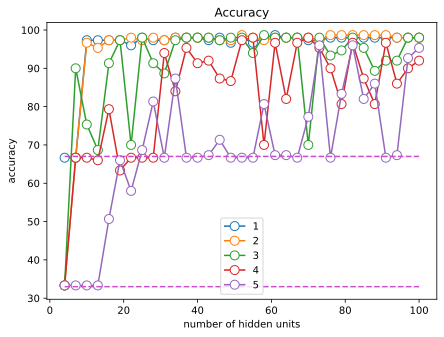

In [24]:
fig,ax=plt.subplots(1,figsize=(7,5))
ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]],[33,33],'--',color=[0.8,0.3,0.8])
ax.plot(numunits[[0,-1]],[67,67],'--',color=[0.8,0.3,0.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('number of hidden units')
ax.set_title('Accuracy')
plt.show()

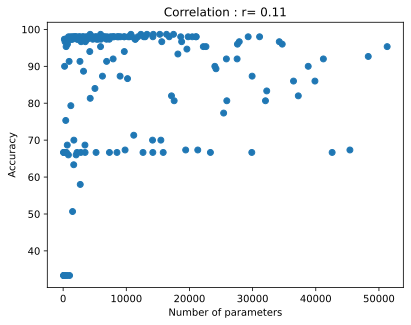

In [25]:
x=totalparams.flatten()
y=accuracies.flatten()
r=np.corrcoef(x,y)[0,1]
plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title(f'Correlation : r= {r:.2f}')
plt.show()